In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def load_data(file_path):

    try:
        data = pd.read_csv(file_path)
        print("Data Loaded Successfully!")
        return data

    except Exception as e:
        print(f"Unable to load data: {e}")


In [7]:
df = load_data("sample_data/housing.csv")

Data Loaded Successfully!


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


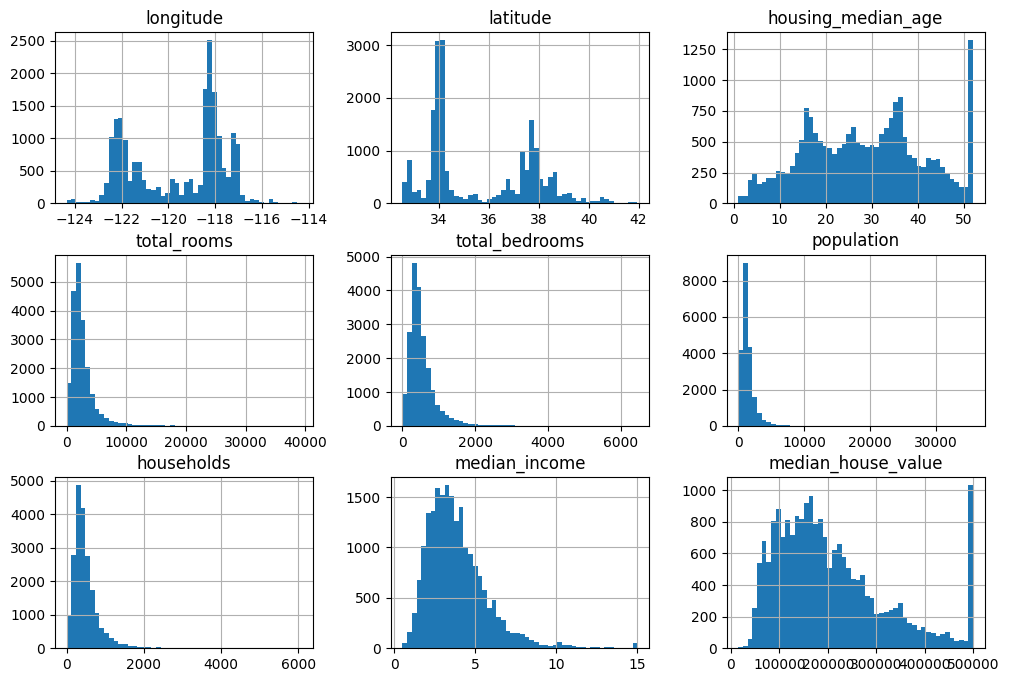

In [11]:
df.hist(bins=50, figsize=(12,8))
plt.show()

<h3> Splitting data into training sets and testing sets manually </h3>

In [12]:
def shuffle_and_split_data(data, ratio, random_number):
    shuffled_indices = random_number.permutation(len(data))  # creates array based on permutation Eg.[3,2,4,0,1]
    test_size = int(len(data) * ratio)  # considering 20% for now
    test_indices = shuffled_indices[:test_size] # Eg. [0:2] → [3,2]
    train_indices = shuffled_indices[test_size: ]   # Eg. [2:4] → [4,0,1]
    return data.iloc[train_indices], data.iloc[test_indices]

random_number = np.random.default_rng(seed=42)
ratio = 0.2
train_data, test_data = shuffle_and_split_data(data=df, ratio=ratio, random_number=random_number)

print("Training data: ",len(train_data))
print("Testing data: ",len(test_data))

Training data:  16512
Testing data:  4128


<h3> Splitting data into training sets and testing sets using scikit learn</h3>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df['income_category'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf])

In [15]:
category_count = df['income_category'].value_counts().sort_index()

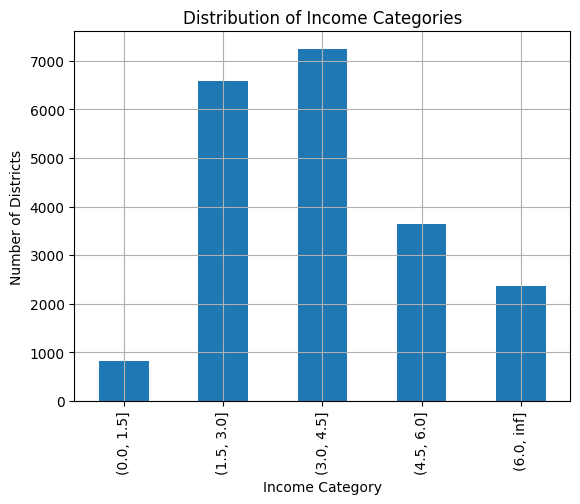

In [16]:
category_count.plot(kind='bar', grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.title('Distribution of Income Categories')
plt.show()

**Stratifying the data to eliminate sampling bias**

In [17]:
training_dataset, testing_dataset = train_test_split(df, test_size=0.2, random_state=42, stratify=df['income_category'])

In [18]:
training_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,"(1.5, 3.0]"
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,"(6.0, inf]"
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,"(1.5, 3.0]"
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,"(1.5, 3.0]"
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,"(3.0, 4.5]"
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,"(4.5, 6.0]"
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,"(1.5, 3.0]"
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,"(3.0, 4.5]"
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,"(3.0, 4.5]"


In [19]:
testing_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,"(6.0, inf]"
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,"(4.5, 6.0]"
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,"(3.0, 4.5]"
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,"(3.0, 4.5]"
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,"(3.0, 4.5]"
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,"(1.5, 3.0]"
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,"(1.5, 3.0]"
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,"(4.5, 6.0]"
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,"(4.5, 6.0]"


**Checking the stratified values, whether it is containing the sufficient proportion of data **

In [20]:
training_dataset['income_category'].value_counts() / len(training_dataset)

,count
income_category,
"(3.0, 4.5]",0.350594
"(1.5, 3.0]",0.318859
"(4.5, 6.0]",0.176296
"(6.0, inf]",0.114462
"(0.0, 1.5]",0.039789


In [21]:
df['income_category'].value_counts() / len(df)

# Hence, the data is in proportion


,count
income_category,
"(3.0, 4.5]",0.350581
"(1.5, 3.0]",0.318847
"(4.5, 6.0]",0.176308
"(6.0, inf]",0.114438
"(0.0, 1.5]",0.039826


**Hence, the traning dataset is containing the correct proportion of data. Acc to data currently being used, there are rows to homogeneous proportion of income categories of people**

**VISUALIZING THE DATA**

In [22]:
trainingSet_copy = training_dataset.copy()

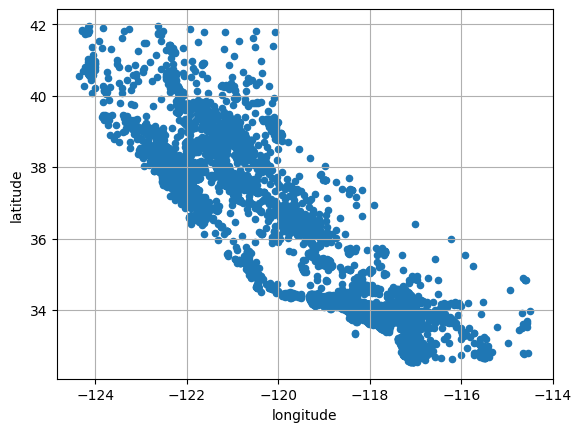

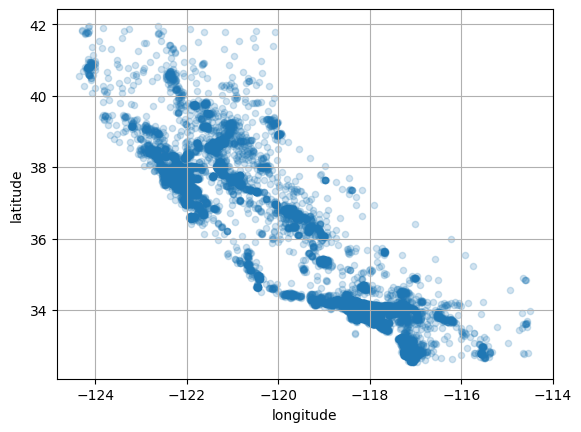

In [23]:
trainingSet_copy.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True)
trainingSet_copy.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

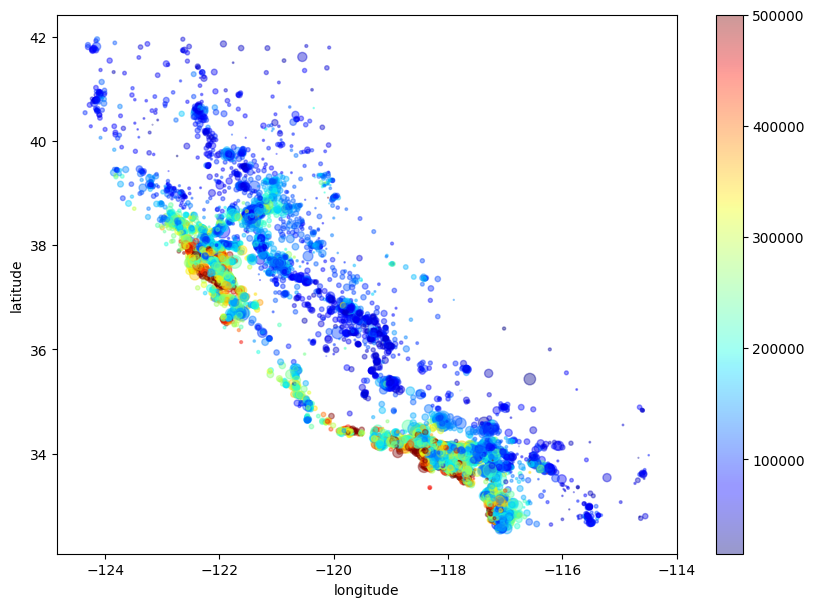

In [24]:
from matplotlib.colors import Colormap
trainingSet_copy.plot(kind = 'scatter',
                      x = 'longitude',
                      y = 'latitude',
                      s = trainingSet_copy['population'] / 100,
                      c = trainingSet_copy['median_house_value'],
                      cmap = 'jet',
                      legend = True,
                      colorbar = True,
                      figsize = (10,7),
                      alpha = 0.4)

**Calculating the correlation matrix**

In [25]:
trainingSet_copy.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


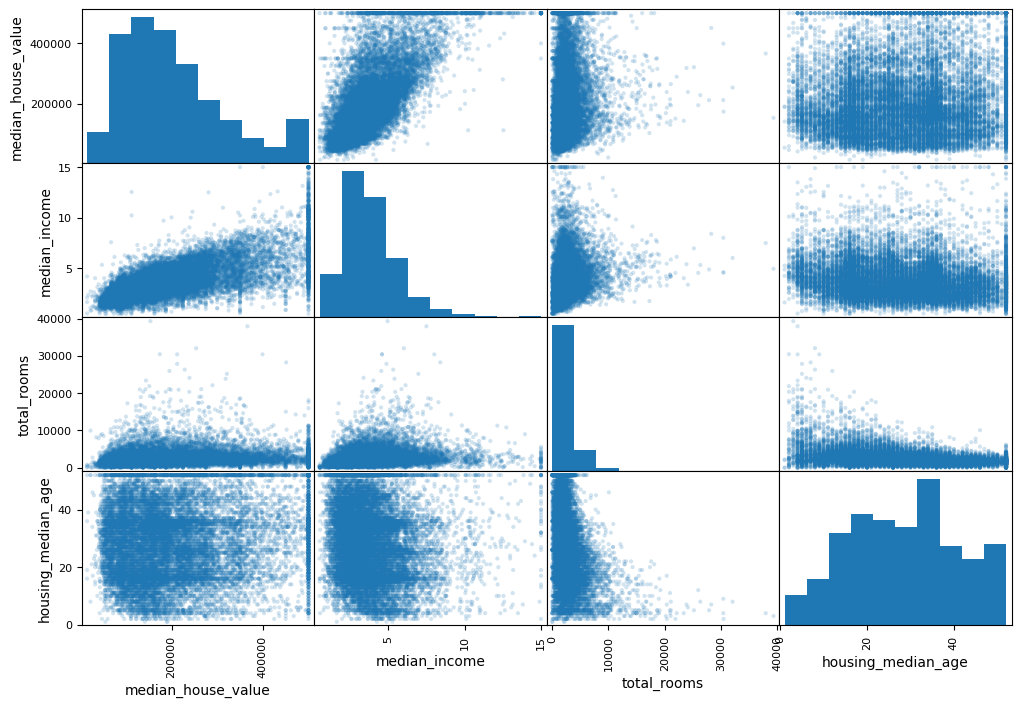

In [26]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(trainingSet_copy[attributes], figsize=(12,8), alpha=0.2)
plt.show()


**Data Cleaning**

In [27]:
housing = training_dataset.drop('median_house_value', axis=1)  # This can be taken as features
housing_labels = training_dataset['median_house_value'].copy() # This can be taken as known outputs

**Checking for null attributes**

In [28]:
trainingSet_copy.isnull().sum()  # found 168 bedrooms having null values

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,168
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # filling the null values in total_bedrooms with the median values of total_bedroom.

In [30]:
# filtering only numerical columns
housing_numerical = housing.select_dtypes(include=[np.number])
imputer.fit(housing_numerical)

# The imputer has simply computed the median of each attribute and stored the result
# in its statistics_ instance variable. Only the total_bedrooms attribute had missing
# values, but you cannot be sure that there won’t be any missing values in new data
# after the system goes live, so it is safer to apply the imputer to all the numerical
# attributes

# ------------------ USING THESE LATER -------------------------------------

# • KNNImputer replaces each missing value with the mean of the
# k-nearest neighbors’ values for that feature. The distance is
# based on all the available features.
#
# • IterativeImputer trains a regression model per feature to
# predict the missing values based on all the other available
# features. It then trains the model again on the updated data,
# and repeats the process several times, improving the models
# and the replacement values at each iteration.

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [32]:
housing_numerical.median().values  # hence, the median values are verified.

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [33]:
X = imputer.transform(housing_numerical)
X  # returns numpy array

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [34]:
housing_num_df = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)
housing_num_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


**Handling Categorical attributes**

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
housing_category = housing[['ocean_proximity']]  # [ [] ] returns 2D Dataframe
print(housing_category.value_counts() )
print(type(housing_category))
# test = housing['ocean_proximity']
# print(type(test))

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [58]:
ordinal_encoder = OrdinalEncoder()
housing_category_ordinal = ordinal_encoder.fit_transform(housing_category)
print(housing_category_ordinal[:8])

[[3.]
 [0.]
 [1.]
 [1.]
 [4.]
 [1.]
 [0.]
 [3.]]


# Ordinal Encoding:
Ordinal Encoding can be used if orders does matter. Otherwise it will create a false weight, which is totally unwanted.
Algorithms like KNN,etc using distances, can have false weight of categories.

# One-Hot Encoding:
In one-hot encoding the particular case will be considered as 1 and other values or categories will be considered as 0.
***Will discuss dimensionality curse in one-hot encoding later***

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
onehot_encoder = OneHotEncoder(sparse_output=False)
# housing_category_onehot = onehot_encoder.fit_transform(housing_category)
# print(housing_category_onehot) # getting a sparse matrix
#Sparse matrix only stores the non-zero values and a pointer pointing place of a value.
#Sparse matrix seems memory efficient
# print(housing_category_onehot.toarray().shape)

housing_category_onehot = onehot_encoder.fit_transform(housing_category)
print(housing_category_onehot) # returns dense array
print(onehot_encoder.categories_)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


# Pandas get_dummy()
This can be used if category can be represented in 1-bit binary.

In [74]:
test = pd.DataFrame({"Gender": ['Male', 'Female']})
pd.get_dummies(test)

,Gender_Female,Gender_Male
0,False,True
1,True,False
